In [0]:
!pip install pymc3
!pip install arviz

# Bayesian Linear Regression

## Exploratory Data Analysis

Kindly note that **Print_Impressions.Ads40** column is changed to **Print_Impressions_Ads40** and **Print_Working_Cost.Ads50** to **Print_Working_Cost_Ads50**



In [0]:
import pymc3 as pm
import pandas as pd
df = pd.read_csv('TrainingData.csv')
df = df.drop(columns=['Period'])

#filling the missing values with the mean
for col in df.columns:
  if col != 'Period':
    df[col] = df[col].fillna((df[col].mean()))
df.head()


,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions_Ads40,Print_Working_Cost_Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,504.784933,1.229424e+07,51957.191257,37148.2,2045.282,2.008683e+06,32298.947990,9.930678e+08,3.202352e+06,7.446883,14.556558,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,5.190196,1.688896,1.427532,8.696588e+09,39.441025,2.611782,0.0339,35.817030,46.059377,32.008333,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,490.226477,1.229424e+07,51957.191257,50886.8,2370.584,1.400000e-05,0.000015,9.930678e+08,3.202352e+06,11.677082,14.556558,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,5.190196,1.687952,1.442716,8.682307e+09,38.417224,2.522814,0.0391,36.389065,46.059377,32.008333,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,479.244686,1.229424e+07,51957.191257,253333.2,3180.888,1.560000e-05,0.000017,9.930678e+08,3.202352e+06,0.102858,14.556558,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,5.190196,1.666359,1.423408,8.706898e+09,36.499442,2.477322,0.0228,36.599984,46.059377,32.008333,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,489.057428,1.229424e+07,51957.191257,3426239.0,13595.398,1.624000e-05,0.000019,9.930678e+08,3.202352e+06,0.249055,14.556558,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,5.190196,1.666359,1.443401,8.660289e+09,38.135159,2.520409,0.0147,38.201852,46.059377,32.008333,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,477.031994,1.229424e+07,51957.191257,552197.8,3983.134,1.649600e-05,0.000019,9.930678e+08,3.202352e+06,13.338804,14.556558,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,5.190196,0.170731,1.473687,8.644519e+09,38.629564,2.497285,0.0219,38.648805,31.702433,25.300000,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


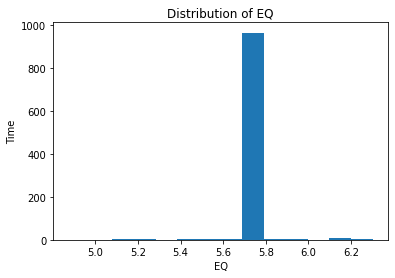

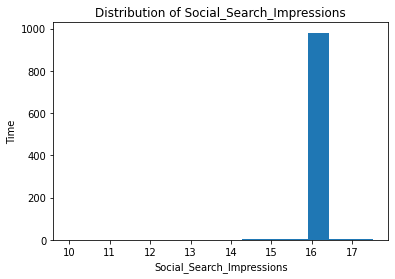

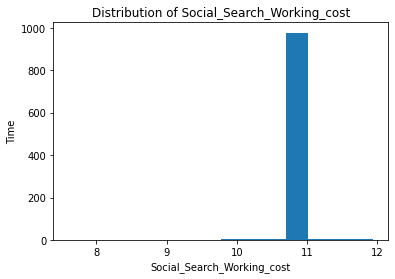

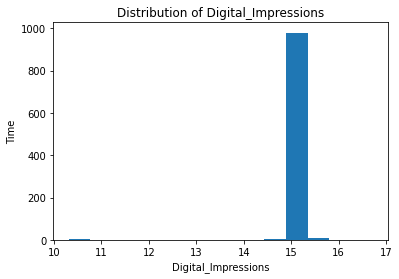

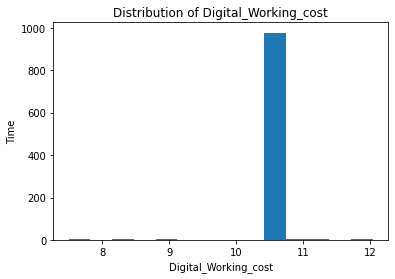

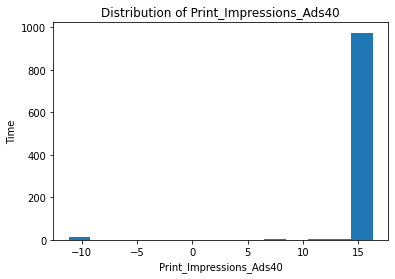

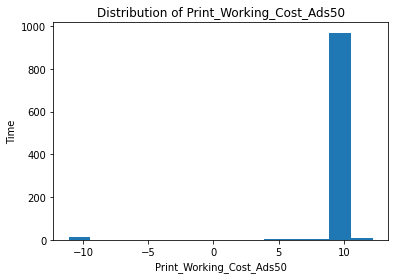

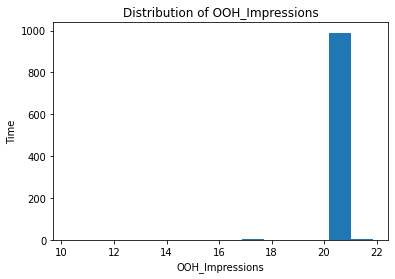

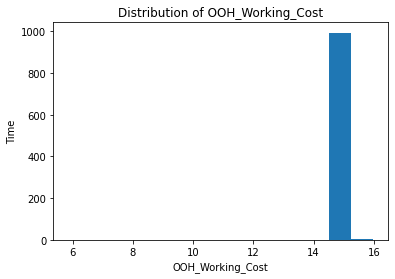

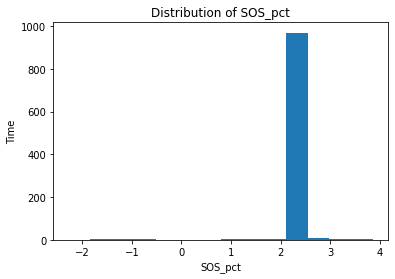

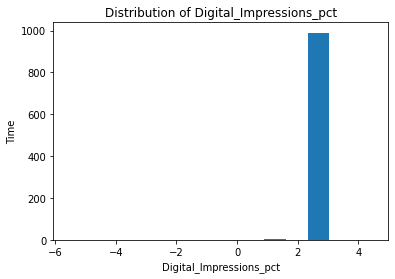

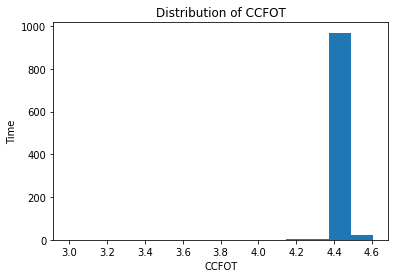

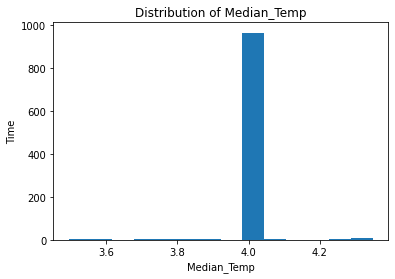

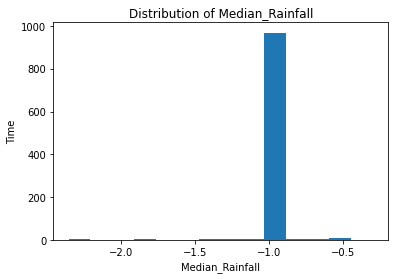

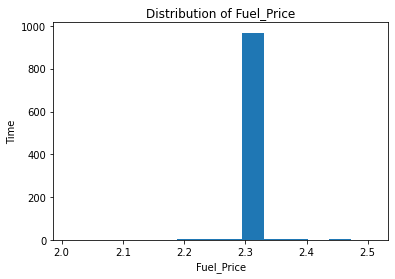

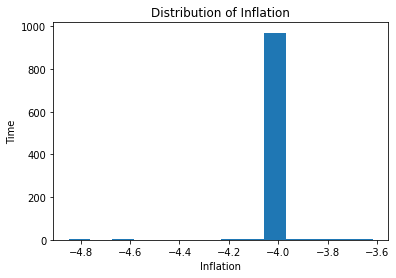

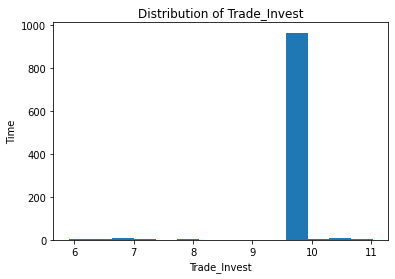

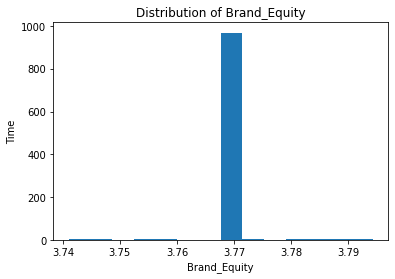

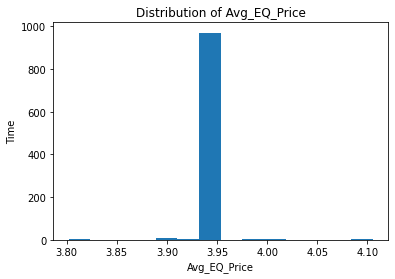

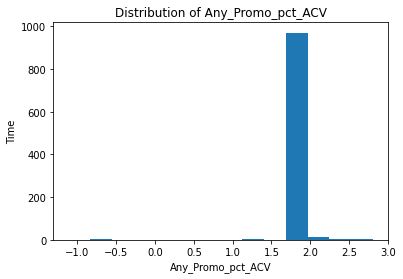

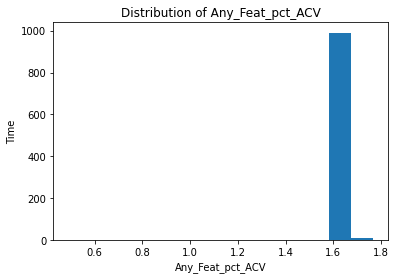

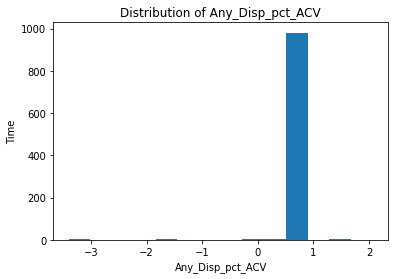

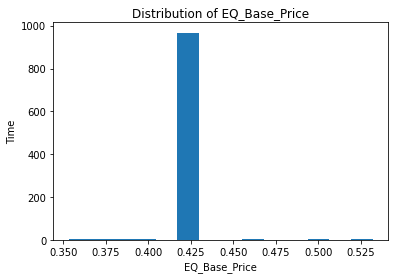

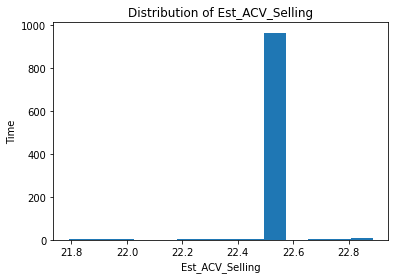

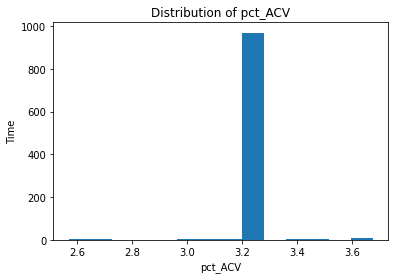

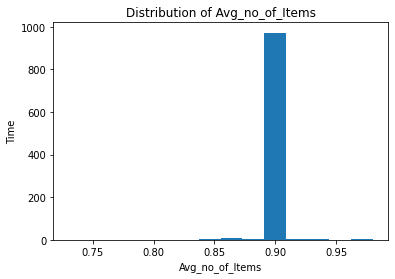

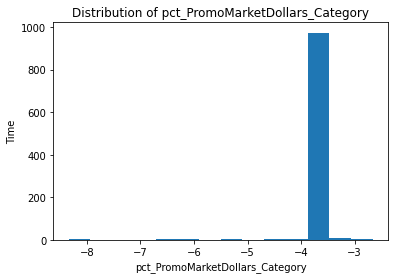

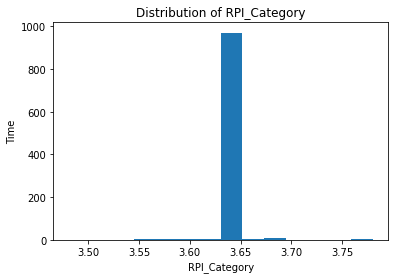

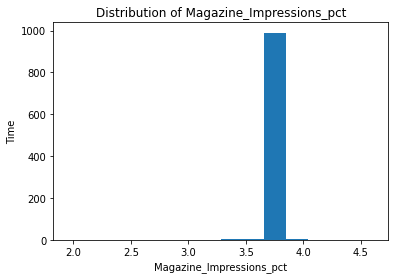

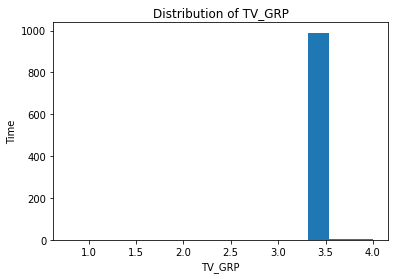

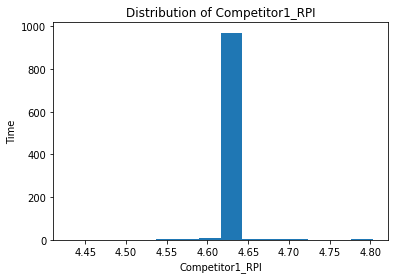

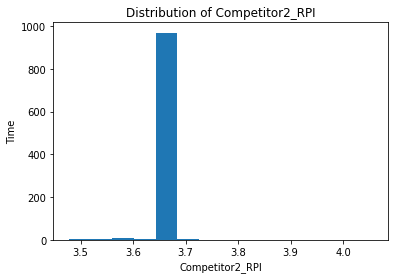

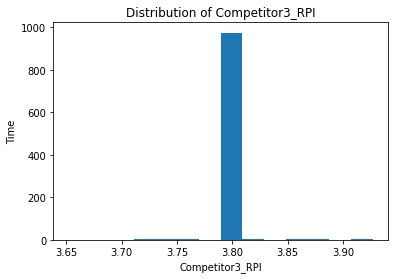

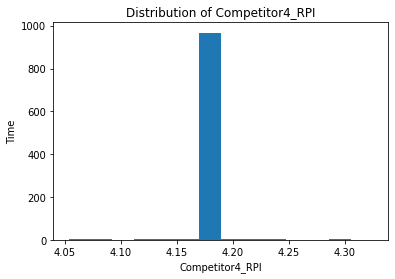

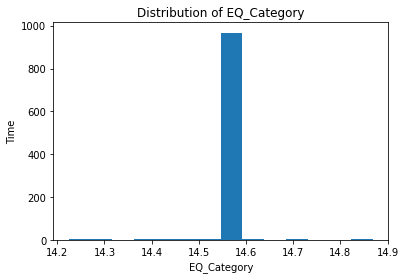

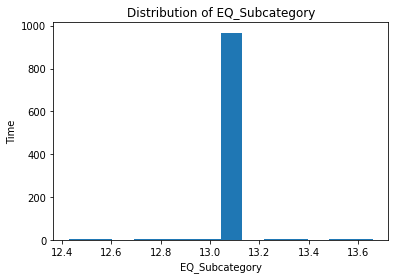

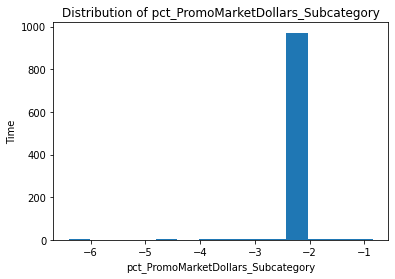

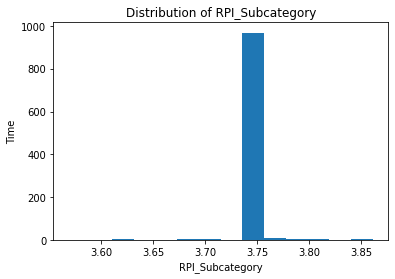

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in df:
    df[i] = np.log(df[i]) 
for i in df:
  plt.hist(df[i], bins = 14)
  plt.xlabel(i)
  plt.ylabel('Time')
  plt.title('Distribution of '+i)
  plt.show()

## Corelation

Finding the correlation between every feature with respect to EQ

In [0]:
df.corr()['EQ'].sort_values()

Fuel_Price                           -0.747984
Inflation                            -0.672471
Digital_Working_cost                 -0.542788
Competitor2_RPI                      -0.442336
Digital_Impressions                  -0.430440
Avg_EQ_Price                         -0.383982
Competitor3_RPI                      -0.374394
Print_Working_Cost_Ads50             -0.274981
Print_Impressions_Ads40              -0.262311
Competitor1_RPI                      -0.229868
EQ_Base_Price                        -0.228147
Any_Feat_pct_ACV                     -0.194918
Magazine_Impressions_pct             -0.163433
Competitor4_RPI                      -0.148903
RPI_Category                         -0.108498
TV_GRP                               -0.084717
SOS_pct                              -0.021240
Digital_Impressions_pct              -0.005542
OOH_Working_Cost                      0.025206
OOH_Impressions                       0.095056
RPI_Subcategory                       0.101087
Social_Search

In [0]:
# Drop the features which have low correlation and are not distributed properly
df = df.drop(columns=['Competitor1_RPI',
                      'Competitor2_RPI',
                      'Competitor3_RPI',
                      'Competitor4_RPI',
                      ])

In [0]:
from sklearn.model_selection import train_test_split
labels = df['EQ']
# df is features and labels are the targets 
# Split by putting 0.5% in the testing set
X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                   test_size = 0.005,
                                                    random_state=42)

In [0]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'EQ ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'EQ ~ Social_Search_Impressions + Social_Search_Working_cost + Digital_Impressions + Digital_Working_cost + Print_Impressions_Ads40 + Print_Working_Cost_Ads50 + OOH_Impressions + OOH_Working_Cost + SOS_pct + Digital_Impressions_pct + CCFOT + Median_Temp + Median_Rainfall + Fuel_Price + Inflation + Trade_Invest + Brand_Equity + Avg_EQ_Price + Any_Promo_pct_ACV + Any_Feat_pct_ACV + Any_Disp_pct_ACV + EQ_Base_Price + Est_ACV_Selling + pct_ACV + Avg_no_of_Items + pct_PromoMarketDollars_Category + RPI_Category + Magazine_Impressions_pct + TV_GRP + EQ_Category + EQ_Subcategory + pct_PromoMarketDollars_Subcategory + RPI_Subcategory'

In [0]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the data likelihood is a Normal Distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula( formula,data = X_train, family = family)
    
    # Draw the specified number of samples
    normal_trace = pm.sample(draws=150, chains = 1, tune = 50, cores=-1)

Only 150 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sd, RPI_Subcategory, pct_PromoMarketDollars_Subcategory, EQ_Subcategory, EQ_Category, TV_GRP, Magazine_Impressions_pct, RPI_Category, pct_PromoMarketDollars_Category, Avg_no_of_Items, pct_ACV, Est_ACV_Selling, EQ_Base_Price, Any_Disp_pct_ACV, Any_Feat_pct_ACV, Any_Promo_pct_ACV, Avg_EQ_Price, Brand_Equity, Trade_Invest, Inflation, Fuel_Price, Median_Rainfall, Median_Temp, CCFOT, Digital_Impressions_pct, SOS_pct, OOH_Working_Cost, OOH_Impressions, Print_Working_Cost_Ads50, Print_Impressions_Ads40, Digital_Working_cost, Digital_Impressions, Social_Search_Working_cost, Social_Search_Impressions, Intercept]
100%|██████████| 200/200 [00:07<00:00, 26.18it/s]
There were 146 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.17207596550199786, but should be close to 

In [0]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(normal_model, open(filename, 'wb'))

In [0]:
pm.summary(normal_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
Intercept,0.586247,0.005064,0.000613,0.583703,0.593666
Social_Search_Impressions,-0.172692,0.004263,0.000518,-0.174522,-0.162817
Social_Search_Working_cost,0.337786,0.005382,0.000658,0.329260,0.339439
Digital_Impressions,0.091886,0.015048,0.001809,0.084613,0.118588
Digital_Working_cost,-0.148756,0.012130,0.001454,-0.185553,-0.144575
Print_Impressions_Ads40,0.058408,0.004746,0.000577,0.055928,0.061047
Print_Working_Cost_Ads50,-0.056454,0.005761,0.000702,-0.059239,-0.053443
OOH_Impressions,0.008146,0.001290,0.000146,0.005631,0.010018
OOH_Working_Cost,-0.077225,0.002845,0.000341,-0.084878,-0.074771
SOS_pct,-0.129356,0.004149,0.000495,-0.137575,-0.126564


In [0]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [0]:
model_formula = 'EQ = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])


'EQ =  0.59 * Intercept + -0.17 * Social_Search_Impressions + 0.34 * Social_Search_Working_cost + 0.09 * Digital_Impressions + -0.15 * Digital_Working_cost + 0.06 * Print_Impressions_Ads40 + -0.06 * Print_Working_Cost_Ads50 + 0.01 * OOH_Impressions + -0.08 * OOH_Working_Cost + -0.13 * SOS_pct + 0.04 * Digital_Impressions_pct + -0.46 * CCFOT + 0.26 * Median_Temp + 0.27 * Median_Rainfall + -0.80 * Fuel_Price + -0.20 * Inflation + 0.08 * Trade_Invest + -0.47 * Brand_Equity + 0.08 * Avg_EQ_Price + 0.51 * Any_Promo_pct_ACV + -0.67 * Any_Feat_pct_ACV + -0.12 * Any_Disp_pct_ACV + -0.80 * EQ_Base_Price + -0.08 * Est_ACV_Selling + -0.21 * pct_ACV + 0.45 * Avg_no_of_Items + -0.71 * pct_PromoMarketDollars_Category + 0.42 * RPI_Category + -0.48 * Magazine_Impressions_pct + -0.25 * TV_GRP + 1.04 * EQ_Category + -0.39 * EQ_Subcategory + 0.45 * pct_PromoMarketDollars_Subcategory + 0.16 * RPI_Subcategory + -2.37 * sd_log__ + 0.09 * sd'

In [0]:
# Evalute the MCMC trace and compare to ml models
import matplotlib.pyplot as plt
def evaluate_trace(trace, Xtest, ytest):
    print('Hello')
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    Xtest['Intercept'] = 1
    
    # Align names of the test observations and means
    names = Xtest.columns[1:]
    Xtest = Xtest.loc[:, names]
    
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = Xtest.index, columns = ['EQ'],dtype=np.float32)
    
    for row in Xtest.iterrows():
        results.loc[row[0], 'EQ'] = np.dot(np.array(var_means), np.array(row[1]))

    
    # Metrics 
    actual = np.array(ytest)
    errors = np.exp(results['EQ']) - np.exp(actual)
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    mape = np.mean(np.abs((np.exp(results['EQ']) - np.exp(actual)) /np.exp(actual))) * 100 
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f} \nModel MAPE: {:.4f}'.format(mae, rmse, mape))
    print()
    
    lst = [i for i in range(len(actual))]
    plt.plot(lst,np.exp(results['EQ']), label = "predict")
    plt.plot(lst,np.exp(actual), label = "actual")
    plt.legend()
    plt.show()
    return results

Hello
Model  MAE: 0.9138
Model RMSE: 0.9138 
Model MAPE: 0.2823



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


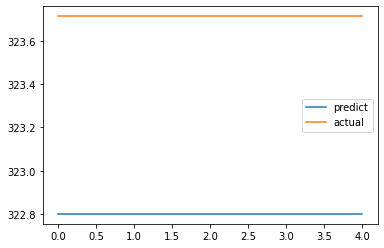

In [0]:
all_model_results = evaluate_trace(normal_trace, X_test, y_test)

In [0]:
# Naive baseline is the median
median_pred = X_train['EQ'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['EQ']
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(np.exp(median_preds), np.exp(true))
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 0.0000
Median Baseline RMSE: 0.0000


In [0]:
import pymc3 as pm
import pandas as pd
test = pd.read_csv('TestData.csv')
test = test.drop(columns=['Period'])
for col in test.columns:
  if col != 'Period':
    test[col] = test[col].fillna((test[col].mean()))
test.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions_Ads40,Print_Working_Cost_Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,392.326431,1314877.0,7398.658606,4280671.0,93152.350735,1.666660e-05,0.000020,9.119710e+08,1.125782e+06,0.280502,5.857897,100.000000,35.45,0.4700,9.884,0.022581,657.53,44.45,50.923311,8.566851,5.581585,1.047858,1.587163,7410277873,32.390628,2.579821,0.06040,36.430769,39.492174,32.1,98.351850,35.773009,42.782645,65.403281,1696093.627,312550.9088,0.384183,40.624047
1,300.922056,21830378.8,98309.553500,7324082.2,111398.203100,1.059535e+07,239751.406700,1.306122e+08,1.361008e+05,11.999073,0.045347,100.000000,67.60,0.4550,10.030,0.015872,390.58,43.85,57.957097,7.990102,5.581585,1.047858,1.647474,5537742006,23.778706,2.509645,0.00990,44.150672,39.492174,32.1,116.098715,37.773410,53.149560,76.896817,2674460.512,818710.9650,0.024751,49.735737
2,247.315476,2829923.6,9938.170001,4280671.0,93152.350735,1.484088e+04,1618.587524,9.119710e+08,1.125782e+06,24.443994,5.857897,83.333333,29.95,0.1550,10.633,0.018029,571.28,42.78,54.551107,6.823758,5.581585,0.294481,1.730202,4723806760,20.495015,2.442941,0.05460,38.676377,39.492174,32.1,107.289052,39.953699,49.153589,65.064755,1645094.597,320624.4770,0.313571,42.670532
3,278.317524,15378465.6,58338.893120,5454810.0,74906.498370,1.519706e+02,50.580880,9.119710e+08,1.125782e+06,0.408558,17.468517,100.000000,71.40,0.5725,12.045,0.026145,1168.95,42.33,46.623404,8.972687,5.581585,1.761352,1.473754,3397924709,14.081542,2.447068,0.03030,35.062487,39.492174,32.1,90.388998,34.106909,41.091068,58.301021,2715526.999,798281.1536,0.078074,38.517608
4,161.529279,285755.2,5232.968000,63120.8,93152.350735,1.929363e+06,24347.693170,1.693330e+09,2.115462e+06,3.492029,0.059827,82.653061,49.40,0.3000,11.766,0.022503,2461.60,42.14,53.438223,1.775007,5.581585,1.087742,1.493424,3214807831,13.676382,2.247411,0.00131,37.871237,39.492174,32.1,100.734978,37.813696,45.792891,65.671466,1628818.628,329510.9938,0.006405,40.955281


In [0]:
# Drop the features which have low correlation and are not distributed properly
test = test.drop(columns=['Competitor1_RPI',
                      'Competitor2_RPI',
                      'Competitor3_RPI',
                      'Competitor4_RPI',])

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in test:
    test[i] = np.log(test[i]) 

Hello
Model  MAE: 91.1799
Model RMSE: 125.2385 
Model MAPE: 30.4608



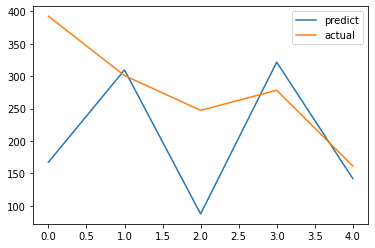

In [0]:
ytest= np.array(test['EQ'])
ytest = pd.Series(ytest)
all_model_results = evaluate_trace(normal_trace, test, ytest)